**The following dataset contains information about adult income from multiple countries

1.) How does income vary by education level?
2.) How does income vary by number of hours worked?
3.) How does income vary by race?
4.) How does income vary by gender?
5.) How does income vary by age?

In [1]:
#Import necessary libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import 'adult.csv' as adult_df 
adult_df = pd.read_csv('adult.csv')

In [3]:
#Check first few observations of adult_df to ensure import was correct
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
#Check size of adult_df
adult_df.shape

(48842, 15)

In [5]:
#Check datatypes of each column & number of non-null values per column using .info()
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
#Check summary of numeric columns of dataset using .describe()
adult_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [7]:
#Create adult_df containing only columns of object type 
adult_df_obj = adult_df.select_dtypes(include = 'object')

In [8]:
#Check 1st few observations of adult_df_obj to ensure it was created correctly
adult_df_obj.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K


In [9]:
#Check number of unique values in each column of adult_df_obj
obj_df_uniq_counts=pd.DataFrame(adult_df_obj.nunique().sort_values(ascending=False)).reset_index()
obj_df_uniq_counts.columns = ['VarName', 'Unique Counts']

In [10]:
#Check unique value counts in newly created dataframe
obj_df_uniq_counts

,VarName,Unique Counts
0,native-country,42
1,education,16
2,occupation,15
3,workclass,9
4,marital-status,7
5,relationship,6
6,race,5
7,gender,2
8,income,2


In [11]:
#Check unique values in each column of adult_df_obj
for column in adult_df_obj:
    print(column + ':')
    print(adult_df_obj[column].unique())

workclass:
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education:
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
marital-status:
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation:
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
relationship:
['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race:
['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
gender:
['Male' 'Female']
native-country:
['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Phili

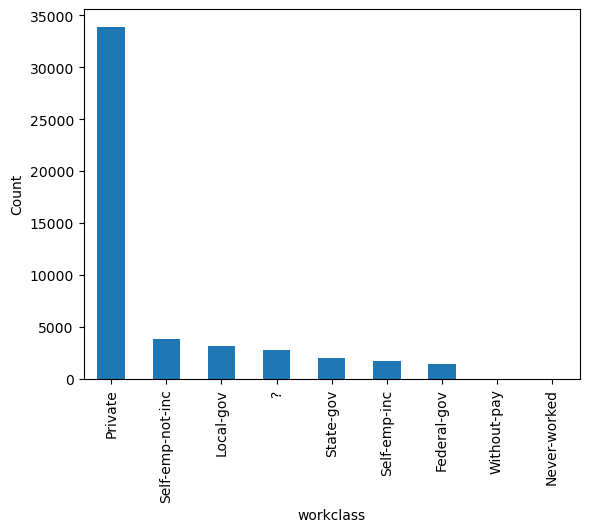

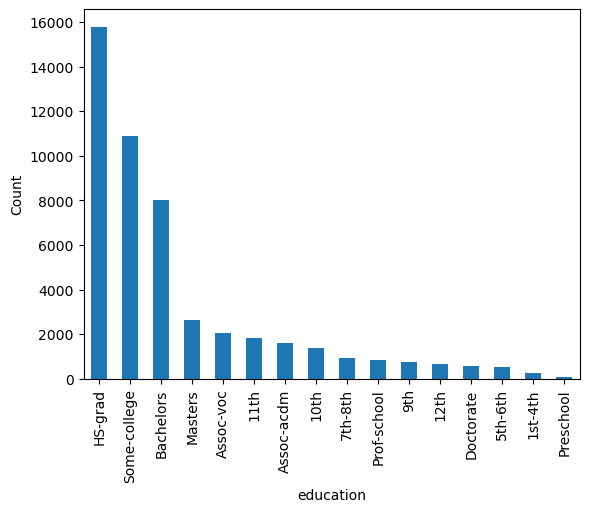

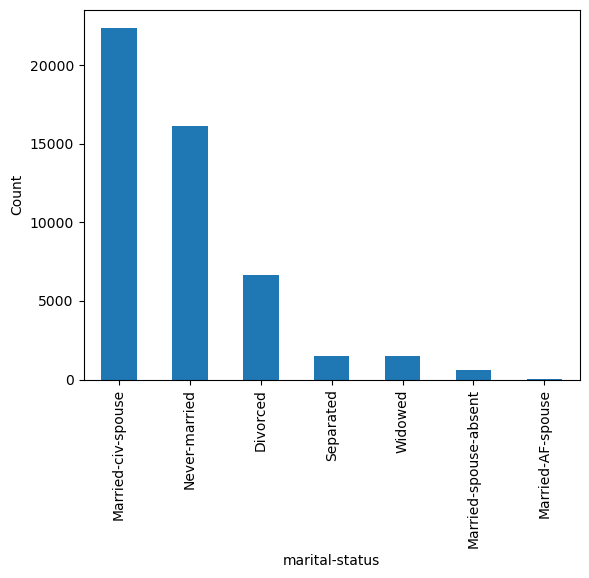

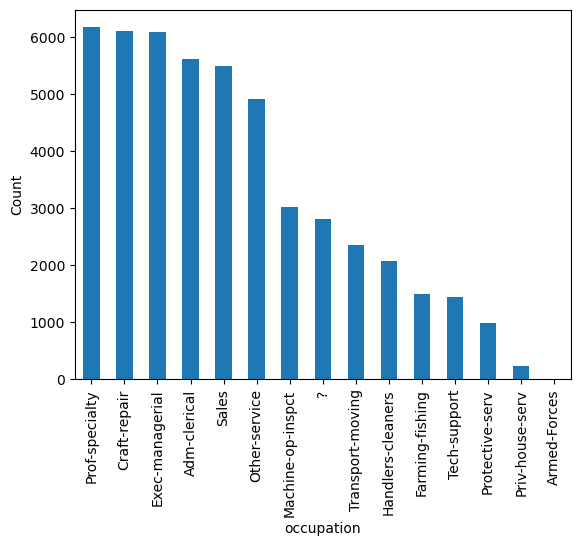

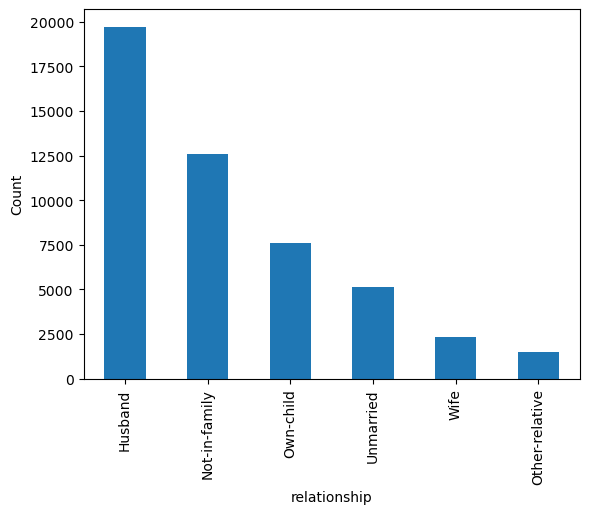

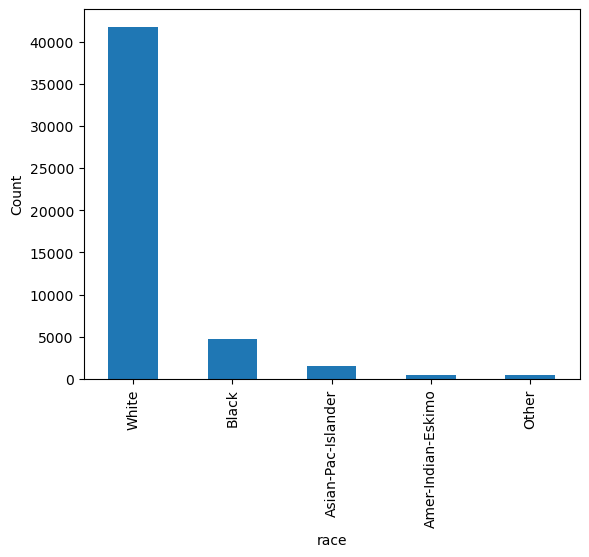

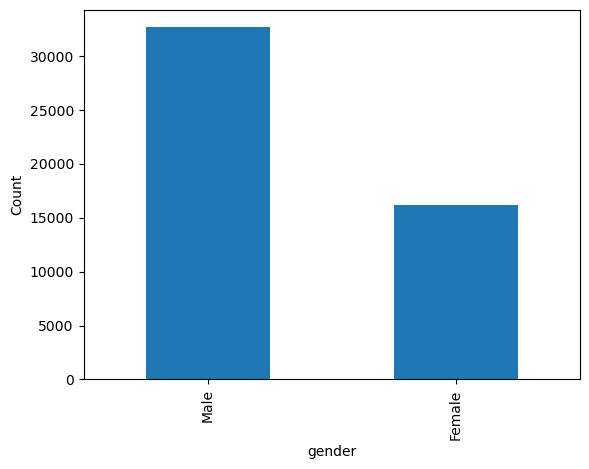

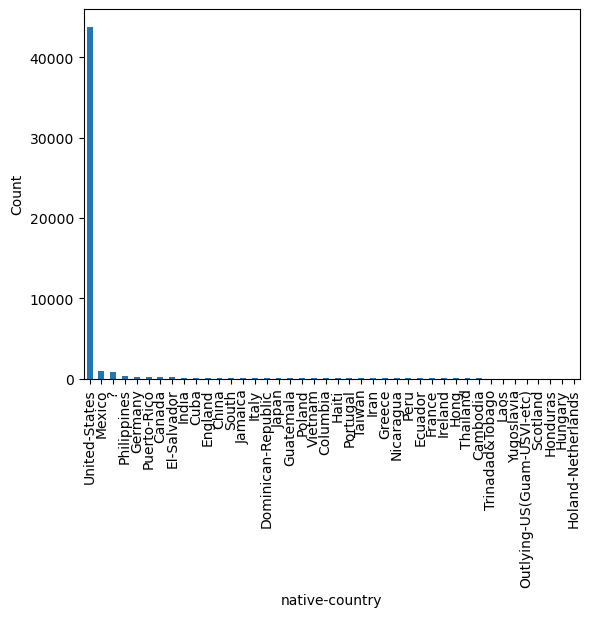

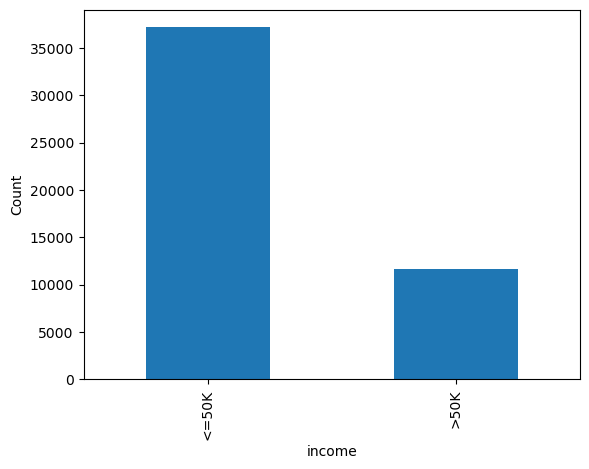

In [12]:
#Check counts of each object variable value
for column in adult_df_obj:
    adult_df_obj[column].value_counts().plot(kind = 'bar', xlabel = column, ylabel = 'Count')
    plt.show()   

In [13]:
#For this analysis since it appears that most data comes from the US, data from other countries will be dropped
adult_df_usa = adult_df[adult_df['native-country'] == 'United-States']

In [14]:
#Check head of new adult_df_usa
adult_df_usa.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [15]:
#Check size of new adult_df_usa
adult_df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43832 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43832 non-null  int64 
 1   workclass        43832 non-null  object
 2   fnlwgt           43832 non-null  int64 
 3   education        43832 non-null  object
 4   educational-num  43832 non-null  int64 
 5   marital-status   43832 non-null  object
 6   occupation       43832 non-null  object
 7   relationship     43832 non-null  object
 8   race             43832 non-null  object
 9   gender           43832 non-null  object
 10  capital-gain     43832 non-null  int64 
 11  capital-loss     43832 non-null  int64 
 12  hours-per-week   43832 non-null  int64 
 13  native-country   43832 non-null  object
 14  income           43832 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.4+ MB


In [16]:
#Review categorical variable columns - 'workclass' & 'marital-status' where some unique were '?' to see how many remain with only US data
print('workclass column unique value counts:')
print(adult_df_usa['workclass'].value_counts())

print('marital-status column unique value counts:')
print(adult_df_usa['marital-status'].value_counts())

workclass column unique value counts:
workclass
Private             30145
Self-emp-not-inc     3510
Local-gov            2941
?                    2530
State-gov            1840
Self-emp-inc         1516
Federal-gov          1320
Without-pay            20
Never-worked           10
Name: count, dtype: int64
marital-status column unique value counts:
marital-status
Married-civ-spouse       20003
Never-married            14481
Divorced                  6208
Widowed                   1378
Separated                 1333
Married-spouse-absent      393
Married-AF-spouse           36
Name: count, dtype: int64


Removing non-USA observations removed all the '?' observations from the marital-status column however ~2530 '?' observations still exist in the workclass column. Since there are only ~2500 bservations where workclass = '?' in a dataset that contains 43382 observations, I will drop these values. Majority of the data will be unexpected by this & I'm unsure the proper categorical to fill in for '?' values of workclass.

In [17]:
#Drop observations where 'workclass' = '?'
adult_df_usa = adult_df_usa[adult_df_usa['workclass'] != '?']

In [18]:
#Check head of dataframe where 'workclass' = '?' values are removed
adult_df_usa.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [19]:
#Verify info of dataframe where 'workclass' = '?' values are removed
adult_df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41302 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              41302 non-null  int64 
 1   workclass        41302 non-null  object
 2   fnlwgt           41302 non-null  int64 
 3   education        41302 non-null  object
 4   educational-num  41302 non-null  int64 
 5   marital-status   41302 non-null  object
 6   occupation       41302 non-null  object
 7   relationship     41302 non-null  object
 8   race             41302 non-null  object
 9   gender           41302 non-null  object
 10  capital-gain     41302 non-null  int64 
 11  capital-loss     41302 non-null  int64 
 12  hours-per-week   41302 non-null  int64 
 13  native-country   41302 non-null  object
 14  income           41302 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.0+ MB


The dataframe is now in a state where we can begin analysis, let's re-run the analysis done previously where histgrams were created for each column containing information about a categorical variable.

In [20]:
#Create adult_df_usa_obj containing only columns of object type 
adult_df_usa_obj = adult_df_usa.select_dtypes(include = 'object')

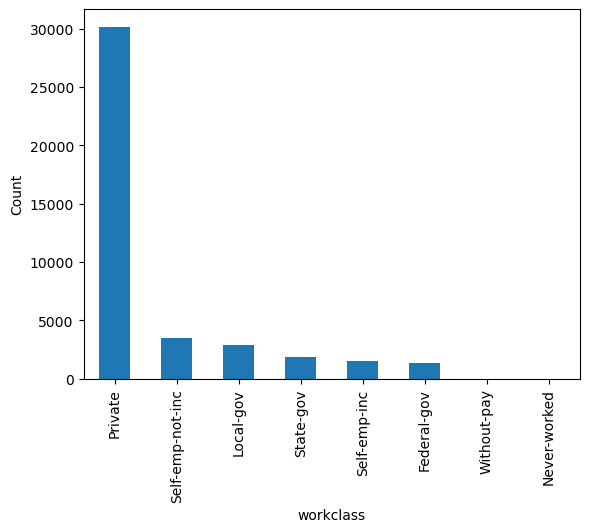

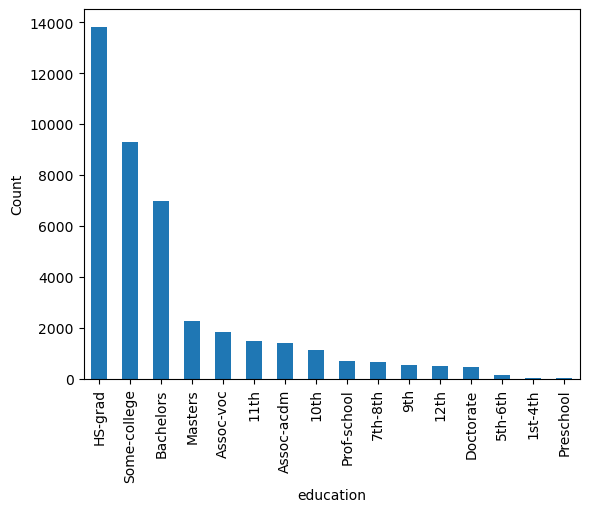

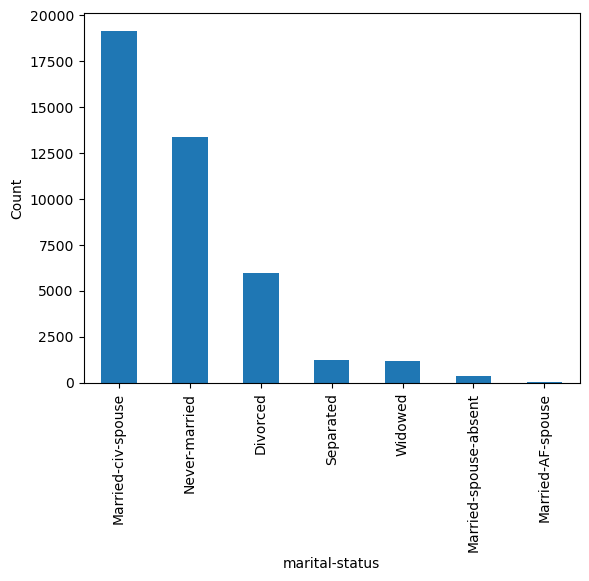

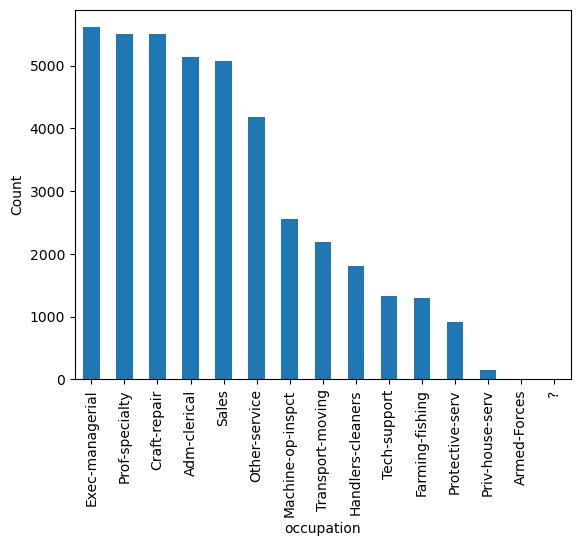

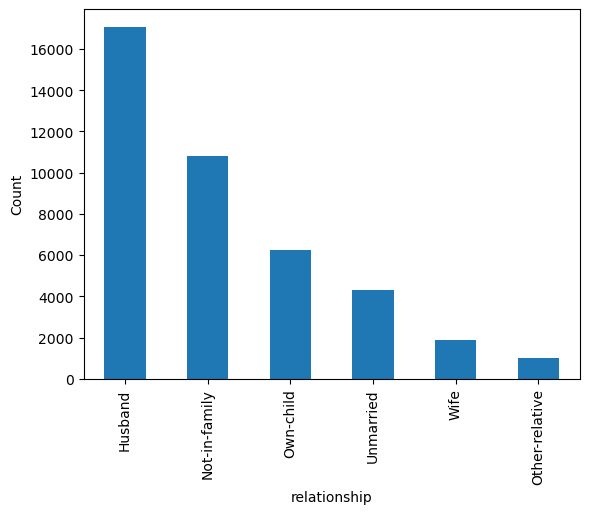

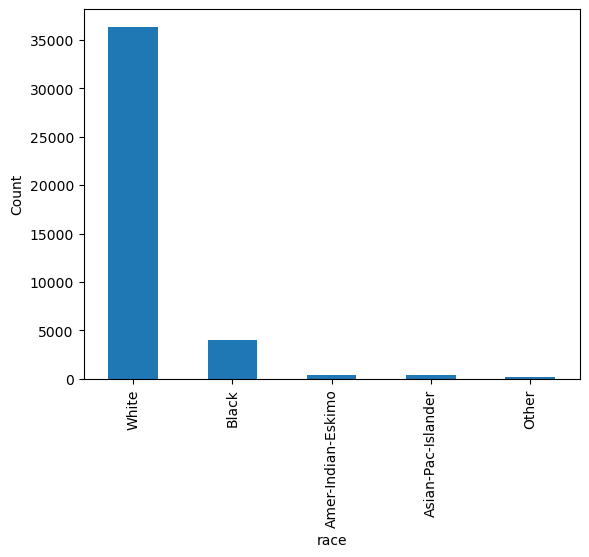

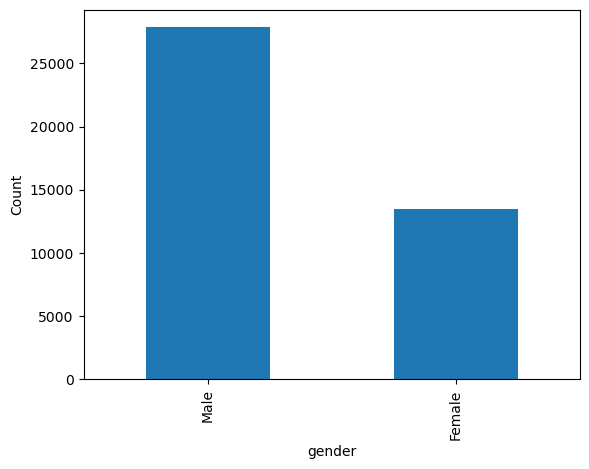

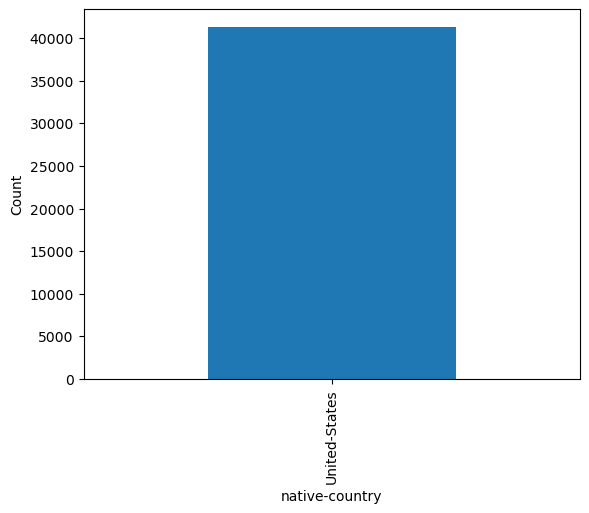

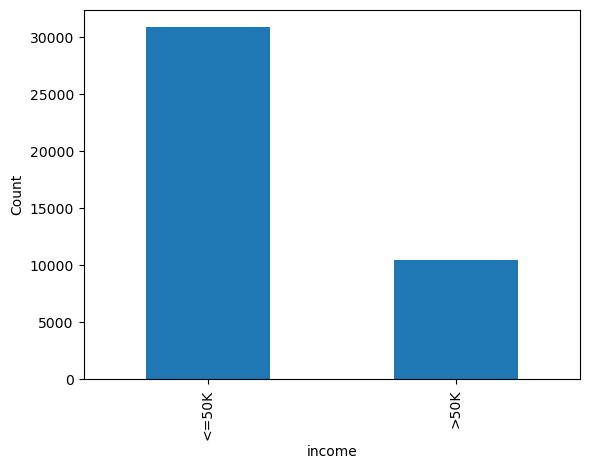

In [21]:
#Re-run histograms of categorical object variables in remaining dataframe
for column in adult_df_usa_obj:
    adult_df_usa_obj[column].value_counts().plot(kind = 'bar', xlabel = column, ylabel = 'Count')
    plt.show()  

Now that the data has been cleaned to retain only observations from USA and remove observations from 'workclass' column that were unrecorded- let's answer some questions.
<br>
<br>
1.) How does income vary by education level? <br>
2.) How does income vary by number of hours worked? <br>
3.) How does income vary by race? <br>
4.) How does income vary by gender? <br>
5.) How does income vary by age? <br>
6.) How does income vary by marital status for females? <br>

C:\Users\jlmar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '10th'),
 Text(1, 0, '11th'),
 Text(2, 0, '12th'),
 Text(3, 0, '1st-4th'),
 Text(4, 0, '5th-6th'),
 Text(5, 0, '7th-8th'),
 Text(6, 0, '9th'),
 Text(7, 0, 'Assoc-acdm'),
 Text(8, 0, 'Assoc-voc'),
 Text(9, 0, 'Bachelors'),
 Text(10, 0, 'Doctorate'),
 Text(11, 0, 'HS-grad'),
 Text(12, 0, 'Masters'),
 Text(13, 0, 'Preschool'),
 Text(14, 0, 'Prof-school'),
 Text(15, 0, 'Some-college')]

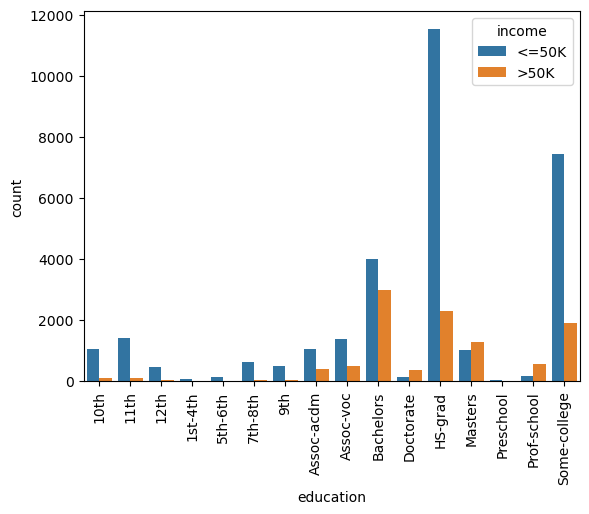

In [22]:
#1. How does income vary by education level?
chart = sns.countplot(adult_df_usa['education'].sort_values(ascending = True), hue = adult_df_usa['income'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

array([[<AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

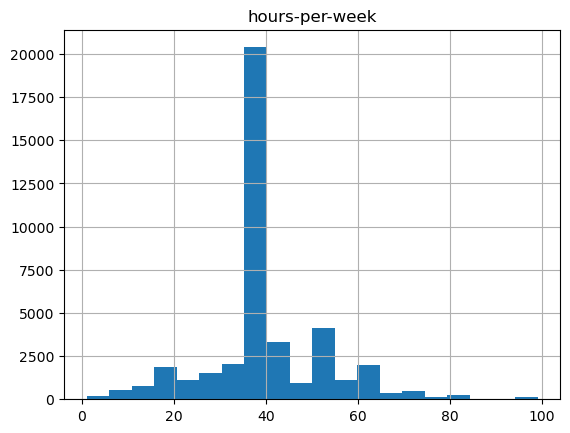

In [23]:
#2.) How does income vary by number of hours worked?
#Review distribution of hours worked in dataset
adult_df_usa.hist(column = 'hours-per-week', bins = 20)

In [24]:
#Create 'hours-per-week' categorical variable in dataset
hours_category = pd.cut(adult_df_usa['hours-per-week'],bins=[0,20,30,35,40,50,60,70,80,100],labels=['Under 20','20-30','30-35','35-40','40-50', '50-60', '60-70', '70-80', '80-100'])
adult_df_usa.insert(13,'Hours_Cat',hours_category)

In [25]:
#Check head of adult_df_usa after adding 'Hours_Cat' column that defines discrete hours worked per week values as categorical groups
adult_df_usa.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,Hours_Cat,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,35-40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,40-50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,35-40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,35-40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,20-30,United-States,<=50K


[Text(0, 0, 'Under 20'),
 Text(1, 0, '20-30'),
 Text(2, 0, '30-35'),
 Text(3, 0, '35-40'),
 Text(4, 0, '40-50'),
 Text(5, 0, '50-60'),
 Text(6, 0, '60-70'),
 Text(7, 0, '70-80'),
 Text(8, 0, '80-100')]

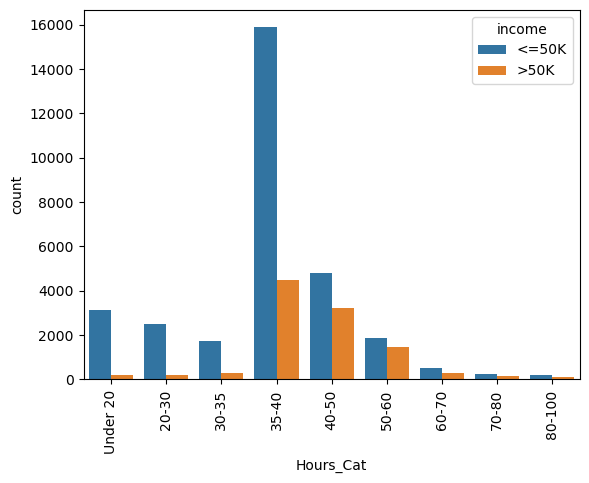

In [26]:
#Investigate how income varies by newly defined hours worked per week groups
chart = sns.countplot(data = adult_df_usa, x = 'Hours_Cat', hue = 'income')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'Black'),
 Text(1, 0, 'White'),
 Text(2, 0, 'Amer-Indian-Eskimo'),
 Text(3, 0, 'Asian-Pac-Islander'),
 Text(4, 0, 'Other')]

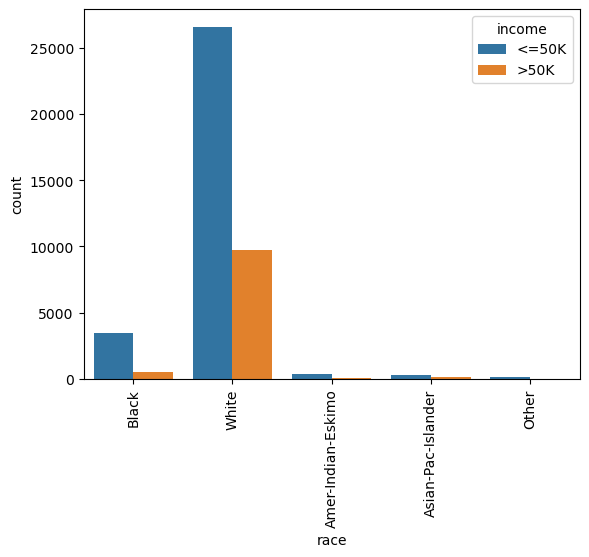

In [27]:
#3.) How does income vary by race?
chart = sns.countplot(data = adult_df_usa, x = 'race', hue = 'income')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

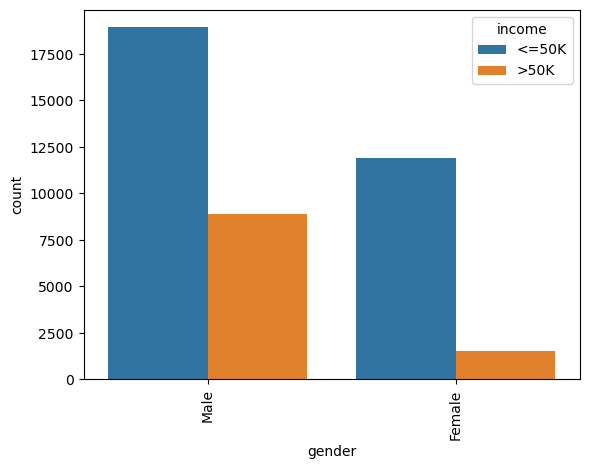

In [28]:
#4.) How does income vary by gender?
chart = sns.countplot(data = adult_df_usa, x = 'gender', hue = 'income')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

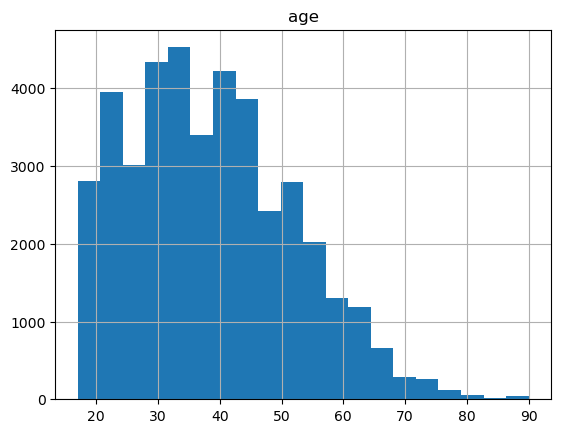

In [29]:
#5.) How does income vary by age?
#Review age distribution in dataset
adult_df_usa.hist(column = 'age', bins = 20)

In [30]:
#Recreate 'Age_Group' column where discrete ages are placed in categorical bins
age_category = pd.cut(adult_df_usa.age,bins=[0,20,30,40,50,60,70,80, 90],labels=['Under 20','20-30','30-40','40-50','50-60', '60-70', '70-80', '80-90'])
adult_df_usa.insert(1,'Age_Group',age_category)

In [31]:
#Check head of adult_df_usa after adding 'Age_Group' column that defines discrete age values as categorical groups
adult_df_usa.head()

,age,Age_Group,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,Hours_Cat,native-country,income
0,25,20-30,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,35-40,United-States,<=50K
1,38,30-40,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,40-50,United-States,<=50K
2,28,20-30,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,35-40,United-States,>50K
3,44,40-50,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,35-40,United-States,>50K
5,34,30-40,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,20-30,United-States,<=50K


[Text(0, 0, 'Under 20'),
 Text(1, 0, '20-30'),
 Text(2, 0, '30-40'),
 Text(3, 0, '40-50'),
 Text(4, 0, '50-60'),
 Text(5, 0, '60-70'),
 Text(6, 0, '70-80'),
 Text(7, 0, '80-90')]

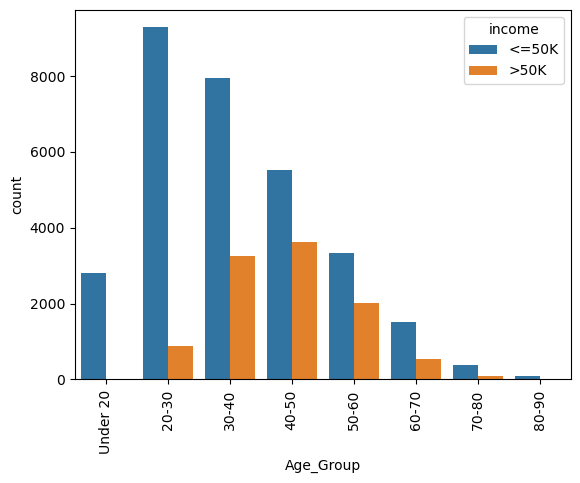

In [32]:
#Investigate how income varies by newly defined age groups
chart = sns.countplot(data = adult_df_usa, x = 'Age_Group', hue = 'income')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [33]:
#6.) How does income vary by marital status for females?
adult_df_usa_females = adult_df_usa[adult_df_usa['gender'] == 'Female']

[Text(0, 0, 'Never-married'),
 Text(1, 0, 'Married-civ-spouse'),
 Text(2, 0, 'Widowed'),
 Text(3, 0, 'Divorced'),
 Text(4, 0, 'Separated'),
 Text(5, 0, 'Married-spouse-absent'),
 Text(6, 0, 'Married-AF-spouse')]

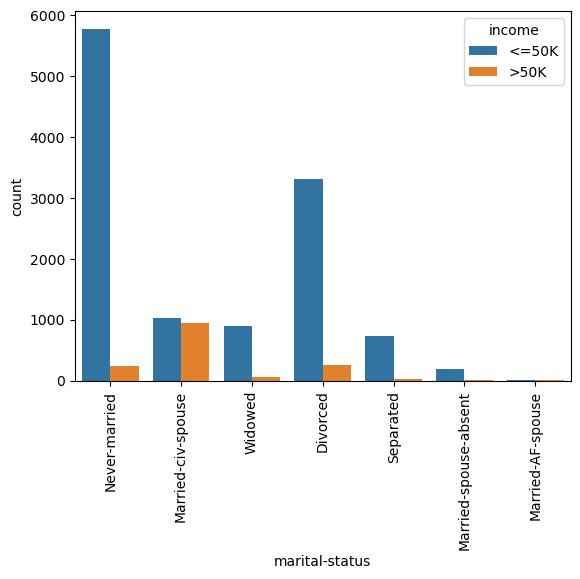

In [34]:
chart = sns.countplot(data = adult_df_usa_females, x = 'marital-status', hue = 'income')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)